# Problem Background: The Great Migration

**Year: 3050**

The world as we knew it has changed drastically. After decades of conflict, disease, and a relentless zombie apocalypse, the human race faces extinction. The relentless hordes of the undead have ravaged cities, reduced populations, and devastated the planet's ecosystems. 

In a desperate bid for survival, the remaining factions of humanity have united to embark on a monumental journey to a new home: **Earth Junior**, a distant planet believed to be free from the scourge of the undead. 

As they prepare for this monumental journey, the survival of the human race hinges on their ability to screen potential passengers at the spaceship station. It is crucial that no zombies are allowed to enter the spacecraft, as even a single infected individual could jeopardize the entire mission and the future of humanity.

In this dire situation, you find yourself as the last surviving machine learning engineer, tasked with developing a screening model to predict the zombie-ness of a person. A high human-zombie score would mean the person is likely to be a zombie. The fate of the human race depends on your expertise in machine learning, and you must create a reliable system to ensure the success of this migration to 'Earth Junior'.


# Human-Zombie Dataset

This dataset simulates human and zombie characteristics based on various lifestyle and physical traits. The dataset contains 1,000 entries, each with features that correlate with a continuous "Human-Zombie Score" ranging from 0 (complete human) to 100 (complete zombie).

This generation of human race has smart-chips embedded in their bloodstream that can keep track of and record all these features.

## Features

- **Height (cm):** The height of the individual measured in centimeters, it decreases with zombie score because zombies are known to shrink in height.

- **Weight (kg):** The weight of the individual measured in kilograms. Zombies tend to have a lower weight because of loss of muscle mass, tissue, organs (and soul??).

- **Screen Time (hrs):** The average number of hours spent in front of screens daily. This feature increases with the human-zombie score, reflecting a more sedentary lifestyle.

- **Junk Food (days/week):** The average number of days per week the individual consumes junk food. This feature also increases with the human-zombie score, indicating poorer dietary habits.

- **Physical Activity (hrs/week):** The total hours spent on physical activities per week. This feature decreases as the human-zombie score increases, suggesting a decline in physical activity.

- **Task Completion (scale):** Scale from 0 to 10 representing how often tasks are completed on time (0 = always on time, 10 = never on time). This score decreases with a higher human-zombie score, indicating declining productivity.

- **Human-Zombie Score:** A continuous score from 0 to 100 representing the degree of "zombie-ness" of the individual, where 0 is fully human and 100 is completely zombie-like.

## Usage

This dataset can be used for various analyses, including regression modeling to predict the human-zombie score based on lifestyle and physical traits.


## Multivariate Linear Regression

We will implement multivariate linear regression (from scratch) to predict the the human-zombie score during screening before the person can be allowed to enter the spaceship.

To do this, we use the human-zombie-datset.csv containing 1000 examples of the features described above and their scores.

Each one of these input features is stored using a different scale. The features include ranges 0-10, 17-100 and some between 130-200. Therefore we will be using normalization.



### Part A: Implementation from Scratch 

#### Imports



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


#### Preparing Data

Loading the dataset and performing train-test split. We will also apply preprocessing steps to cater to missing values, categorical variables etc. 

In [2]:
def preprocess_data(df):
    def fill_missing(column):
        if pd.api.types.is_numeric_dtype(column):
            return column.fillna(column.mean())
        else:
            return column.fillna(column.mode().iloc[0])

    df = df.apply(fill_missing, axis=0)
    print(df.head())

    col_missing_threshold = 0.9 * len(df)
    df = df.loc[:, df.isnull().mean() < 0.75]

    row_missing_threshold = 0.9 * len(df.columns)
    df = df[df.isnull().sum(axis=1) < row_missing_threshold]

    categorical_columns = df.select_dtypes(include=['object']).columns
    if len(categorical_columns) > 0:
        df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

    return df


df = pd.read_csv('human_zombie_dataset_v5.csv')
df = preprocess_data(df)

x = df.drop('Human-Zombie Score', axis=1)  
y = df['Human-Zombie Score']               


   Height (cm)  Weight (kg)  Screen Time (hrs)  Junk Food (days/week)  \
0          157           41           8.455099               5.622736   
1          151           40           8.581430               5.922744   
2          166           45           5.018847               5.746557   
3          160           75           6.417010               4.634547   
4          153           74           4.417465               4.740153   

   Physical Activity (hrs/week)  Task Completion (scale)  Human-Zombie Score  
0                      4.474819                 6.166119           54.881350  
1                      3.749707                 1.084877           71.518937  
2                      4.596662                 2.030814           60.276338  
3                      4.546153                 3.360430           54.488318  
4                      6.601801                 5.758603           42.365480  


In [3]:
# train-test-split and shapes checking

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#### Normalizing Data  
For models like Linear/Logistic Regression, and even for Neural Networks, Standardization/Normalization is a non-negotiable step in the preprocessing stage. You would find your model **broken** if you do not normalize your data.

One nice way to implement this is to create a class, `StandardScaler` that can be used to store the mean and standard deviation of each feature of the training set. The `StandardScaler` class also has two functions, `fit` and `transform`.

- The `fit` function is used to calculate the mean and standard deviation of each feature of the training set. [10 points]

- The `transform` function is used to transform all the features using the corresponding mean and standard deviation, i.e. subtracting the mean and dividing by the standard deviation. [10 points]

A very subtle and important point to note here is that the mean and standard deviation should be calculated only on the training set, and then applied to the test set. This is because in real-world scenarios, we do not have access to the test set, and hence we cannot calculate the mean and standard deviation of the test set.

In [4]:

class StandardScaler:
    def __init__(self):
        self.means = None
        self.stds = None
    
    def fit(self, x):
        self.means = x.mean(axis=0)
        self.stds = x.std(axis=0)
    
    def transform(self, x):
        centered_data = x - self.means
        scaled_data = centered_data / self.stds
        return scaled_data


scaler = StandardScaler()
scaler.fit(x_train)  
x_train_normalised = scaler.transform(x_train) 
x_test_normalised = scaler.transform(x_test)   

print(x_train_normalised[:6])


     Height (cm)  Weight (kg)  Screen Time (hrs)  Junk Food (days/week)  \
29     -0.846344    -0.405839          -0.123238              -0.515404   
535     0.265438    -0.007225          -1.189232              -1.801627   
695     0.980155    -0.272967          -0.096385              -0.452251   
557     0.265438     0.657131           0.454413              -0.404284   
836    -1.243409    -1.203066           1.827119               1.025443   
596    -0.369866     2.384458          -0.087488              -1.031357   

     Physical Activity (hrs/week)  Task Completion (scale)  
29                       0.150247                 0.343609  
535                      1.342709                 0.900165  
695                      0.418624                 0.227821  
557                      0.447834                 0.581333  
836                     -1.704087                -0.836086  
596                      0.069791                 0.163497  


#### Gradient Descent

We will be creating a class `LinearRegression` with the following methods:

- `__init__`: The constructor of the class. To initialize any variables, like the learning rate and the number of iterations.

- `fit`: This method will be used to train the model. It should take in the training data and labels as parameters, and learn the parameters using gradient descent. Save the loss values after every iteration in a list, and return it (for plotting later).

- `predict`: This method will be used to predict the labels for a given set of test data. It should take in the test data as a parameter, and return the predicted labels.

- `score`: This method will be used to calculate the mean square error for the test data. It should take in the test data and labels as parameters, and return the mean square error. 



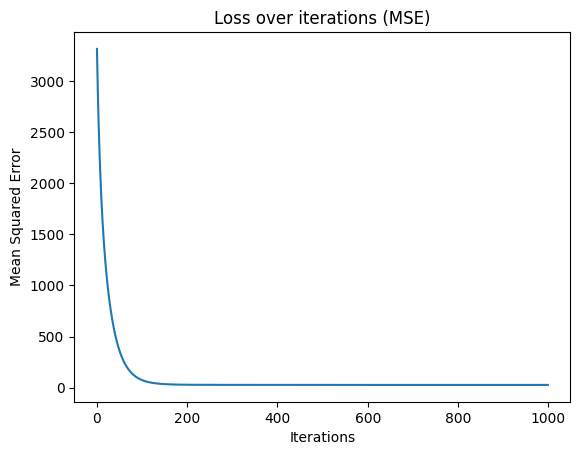

Training MSE: 13.32
Test MSE: 12.05


In [5]:
class LinearRegressior:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        m, features = x.shape
        losses = []
        self.weights = np.zeros(features)
        self.bias = 0

        for i in range(self.iterations):
            y_pred = np.dot(x, self.weights) + self.bias
            errors = y_pred - y
            loss = (1/m) * np.sum((errors) ** 2)
            losses.append(loss)

            gradient_weights = np.dot(x.T, (errors))
            weight_updates = (2/m) * gradient_weights

            bias_updates = (2/m) * np.sum(errors)

            self.weights = self.weights - self.learning_rate * weight_updates
            self.bias = self.bias - self.learning_rate * bias_updates

        return losses

    def predict(self, x):
        weighted_sum = np.dot(x, self.weights)
        predictions = weighted_sum + self.bias
        return predictions

    def score(self, x, y):
        y_pred = self.predict(x)
        residuals = y_pred - y
        squared_errors = residuals ** 2
        mse = np.mean(squared_errors)        
        loss = mse / 2
        return loss


model = LinearRegressior(learning_rate=0.01, iterations=1000)
losses = model.fit(x_train_normalised, y_train)


plt.plot(losses)
plt.title("Loss over iterations (MSE)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.show()

train_mse = model.score(x_train_normalised, y_train)
test_mse = model.score(x_test_normalised, y_test)

print(f"Training MSE: {train_mse:.4g}")
print(f"Test MSE: {test_mse:.4g}")




### Part B: Regularized Linear Regression Using Scikit-learn 




#### Importing Libraries

You have to use scikit-learn for this task

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

#### Linear Regression (using `sklearn`)



In [7]:

linear_model = LinearRegression()
linear_model.fit(x_train_normalised, y_train)
y_pred = linear_model.predict(x_test_normalised)
mse_linear = mean_squared_error(y_pred, y_test)
print("Linear Regression MSE:", mse_linear/2)

Linear Regression MSE: 12.072050097507992


#### Ridge

Using the [Mean Squared Error] to find loss and print it. Plotting the regularization coefficients alpha (x-axis) with learned parameters $\theta$  (y-axis) for Ridge. 

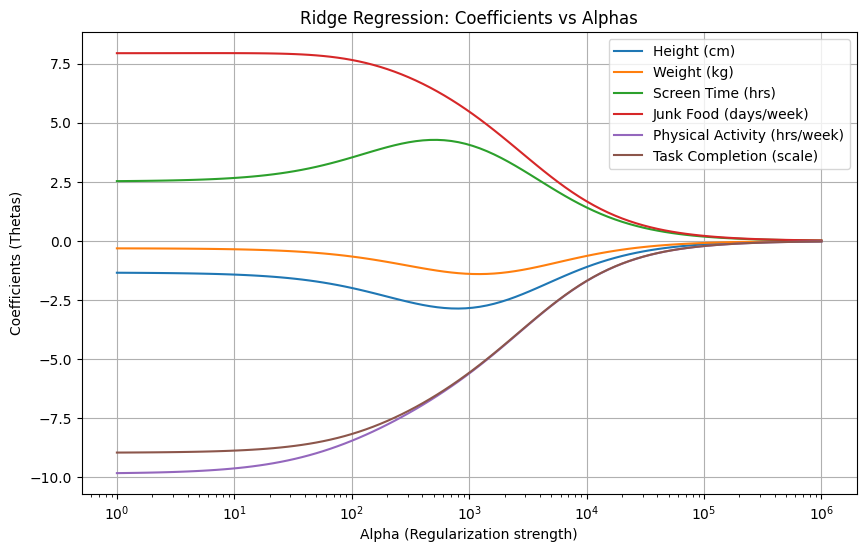

Best alpha (lowest MSE) is: 10.722672220103231
Test MSE (Ridge with alpha=10.722672220103231): 12.05
Ridge coefficients (alpha=10.722672220103231): [-1.42861018 -0.35554707  2.67373735  7.94117789 -9.60373196 -8.86009407]


In [8]:

feature_names = df.columns
alpha_range = np.logspace(0, 6, 100)  
ridge_coeff_list = []
ridge_mse_list = []  

for alpha in alpha_range:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_train_normalised, y_train)
    ridge_coeff_list.append(ridge_model.coef_)

    y_predicted = ridge_model.predict(x_test_normalised)
    mse = mean_squared_error(y_test, y_predicted)
    ridge_mse_list.append(mse)  

ridge_coeffs = np.array(ridge_coeff_list)

plt.figure(figsize=(10, 6))
for i in range(ridge_coeffs.shape[1]):
    plt.plot(alpha_range, ridge_coeffs[:, i], label=feature_names[i])  

plt.xscale('log')
plt.xlabel('Alpha (Regularization strength)')
plt.ylabel('Coefficients (Thetas)')
plt.title('Ridge Regression: Coefficients vs Alphas')
plt.legend()
plt.grid(True)
plt.show()


min_mse_index = np.argmin(ridge_mse_list)  
best_alpha = alpha_range[min_mse_index]  
print(f"Best alpha (lowest MSE) is: {best_alpha}")


ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(x_train_normalised, y_train)


y_predicted = ridge_model.predict(x_test_normalised)
ridge_mse = mean_squared_error(y_test, y_predicted)
print(f"Test MSE (Ridge with alpha={best_alpha}): {ridge_mse/2:.4g}")


print(f"Ridge coefficients (alpha={best_alpha}):", ridge_model.coef_)




#### Lasso

Using the [Mean Squared Error] to find loss and print it. Plotting the regularization coefficients alpha (x-axis) with learned parameters $\theta$  (y-axis) for Lasso. 

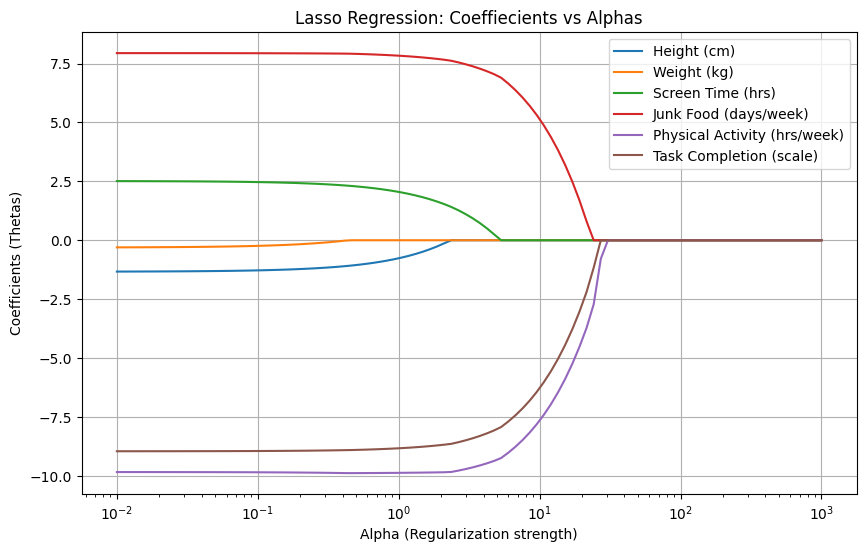

Best alpha (lowest MSE) is: 0.01
Test MSE (Lasso with alpha=0.01): 12.07
Lasso coefficients (alpha=0.01): [-1.33011331 -0.30233057  2.50945782  7.94225627 -9.83992234 -8.95687454]


In [9]:
feature_names = df.columns
alpha_range = np.logspace(-2, 3, 100)  
lasso_coeff_list = []
lasso_mse_list = []


for alpha in alpha_range:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(x_train_normalised, y_train)
    lasso_coeff_list.append(lasso_model.coef_)
    y_predicted = lasso_model.predict(x_test_normalised)
    mse = mean_squared_error(y_test, y_predicted)
    lasso_mse_list.append(mse)  

lasso_coeffs = np.array(lasso_coeff_list)

# Plotting 
plt.figure(figsize=(10, 6))
for i in range(lasso_coeffs.shape[1]):
    plt.plot(alpha_range, lasso_coeffs[:, i], label=feature_names[i])  
    
plt.xscale('log')
plt.xlabel('Alpha (Regularization strength)')
plt.ylabel('Coefficients (Thetas)')
plt.title('Lasso Regression: Coeffiecients vs Alphas')
plt.legend()
plt.grid(True)
plt.show()



min_mse_index = np.argmin(lasso_mse_list)  
best_alpha = alpha_range[min_mse_index]  
print(f"Best alpha (lowest MSE) is: {best_alpha}")

min_mse_index = np.argmin(lasso_mse_list)  
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(x_train_normalised, y_train)

y_predicted = lasso_model.predict(x_test_normalised)
lasso_mse = mean_squared_error(y_test, y_predicted)
print(f"Test MSE (Lasso with alpha={best_alpha}): {lasso_mse/2:.4g}")


print(f"Lasso coefficients (alpha={best_alpha}):", lasso_model.coef_)

#### Elastic Net

Using the [Mean Squared Error] to find loss and print it. 

Best Alpha: 0.0221, l1_ratio: 0.5: Train MSE: 13.326, Test MSE: 12.057


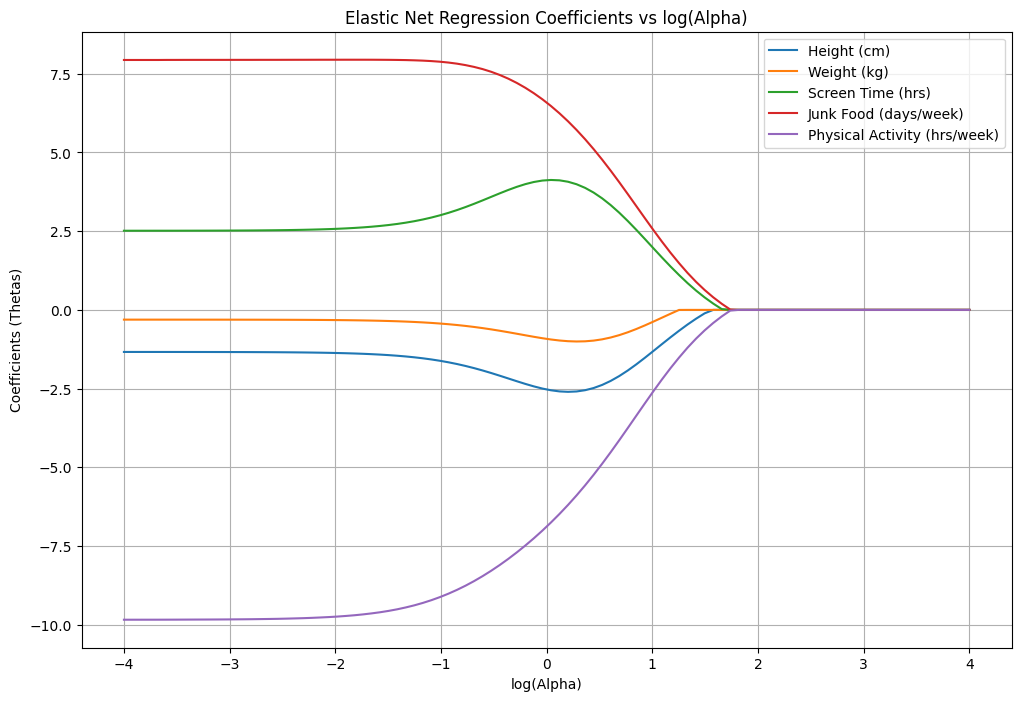

In [10]:
alpha_range_en = np.logspace(-4, 4, 100)
en_mses = []
en_coeff_list = []

l1_ratio = 0.5
best_alpha = None
lowest_test_mse = float('inf')

for alpha in alpha_range_en:
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
    model.fit(x_train_normalised, y_train)
    
    y_train_predicted = model.predict(x_train_normalised)
    y_test_predicted = model.predict(x_test_normalised)
    
    mse_train = mean_squared_error(y_train, y_train_predicted) / 2
    mse_test= mean_squared_error(y_test, y_test_predicted) / 2
    
    en_mses.append((alpha, mse_train, mse_test))
    en_coeff_list.append(model.coef_)
    
    if mse_train < lowest_test_mse:
        lowest_test_mse = mse_test
        best_alpha = alpha

best_result = min(en_mses, key=lambda x: x[2])  
best_alpha, best_train_mse, best_test_mse = best_result
print(f"Best Alpha: {best_alpha:.4f}, l1_ratio: {l1_ratio}: Train MSE: {best_train_mse:.3f}, Test MSE: {best_test_mse:.3f}")
en_coeff_list = np.array(en_coeff_list)


plt.figure(figsize=(12, 8))
log_alpha = np.log10(alpha_range_en)

for i in range(en_coeff_list.shape[1] - 1):
    plt.plot(log_alpha, en_coeff_list[:, i], label=feature_names[i])

plt.xlabel('log(Alpha)')
plt.ylabel('Coefficients (Thetas)')
plt.title('Elastic Net Regression Coefficients vs log(Alpha)')
plt.legend(loc='best')
plt.grid(True)
plt.show()
